Integrantes

Diego De Lama

Julio Diaz

Pedro Añanca

Erika Tello

###Idea 2: Usando computación evolutiva para encontrar localizaciones optimas de una cadena de supermercados

Una conocida cadena de supermercados desea ingresar al mercado limeño. Usted, como experto en IA, ha sido contratado para proponer donde deben ser localizados los supermercados. Para ello, se le está proporcionando un mapa de la ciudad con 60 locales candidatos donde la cadena de supermercados podría localizar sus supermercados. Dicho mapa puede encontrarlo en:
https://drive.google.com/open?id=1w7n77ByWK6TrX74lOBTwID719LRj_UQz&usp=sharing
 
 La cadena tiene presupuesto para instalar 10 supermercados. Se le está proporcionando también una tabla con las coordenadas de las localizaciones candidatas y la población estimada que hay en 500 metros a la redonda (Candidatos_supermercados.xlsx).

Su objetivo es escoger los supermercados de manera que se maximice la suma de la población que vive a 500m alrededor de los supermercados y la suma de las distancias entre los supermercados escogidos. 


###Para resolver el problema

1) Un algoritmo genético mono-objetivo. Cada individuo debe representar una colección de 10 localizaciones. Se sugiere que el cromosoma de un individuo sea un string de 60 bits, cada bit representando si una localización esta seleccionado o no. Para evaluar un individuo se puede usar como función fitness la suma de distancias entre todos los posibles pares de localizaciones escogidas en el individuo (45 pares distintos) más la suma de las poblaciones alrededor de cada supermercado escogido. Implemente operadores de
cruzamiento, mutación y selección adecuados para garantizar que los individuos resultantes sean válidos (representen colecciones de 10 localizaciones). Experimente varias veces el algoritmo implementado con una población de 100 individuos y 500 generaciones (se sugiere ejecutar 10 veces) y registre en una tabla los mejores individuos de cada ejecución, sus fitness y los componentes del fitness desagregados (suma de distancias y suma de población). 


2) Un algoritmo genético multiobjetivo (NSGA-II). La representación de los cromosomas seria la misma que el caso mono-objetivo. Los objetivos serian: a) suma de distancias entre todos los posibles pares de localizaciones escogidas en el individuo; y b) suma de las poblaciones alrededor de cada supermercado escogido en el individuo. Los operadores de cruzamiento,
mutación pueden ser los mismos del caso mono-objetivo. Experimente varias veces el algoritmo implementado con una población de 100 individuos y 500 generaciones (se sugiere ejecutar 10 veces). En cada ejecución registre los individuos de la frontera de Pareto final, así como los valores de las funciones objetivos de dichos individuo. Realice Plots de las fronteras de Pareto encontradas, ubicando en dichos plots los puntos de los mejores
individuos encontrados con el algoritmo mono-objetivo. 

Se debe entregar notebooks con las implementaciones e Informe con descripción del algoritmo mono-objetivo y multi-objetivo implementado (representación de individuos, operadores de cruzamiento, mutación, etc). Tablas de resultados y análisis de los mismos para el algoritmo mono-objetivo.Plots de resultados y análisis de los mismos para el algoritmo multi-objetivo.Comparación de resultados presentados en b) y c) y sus conclusiones respecto a su idoneidad en el problema abordado

### Librerias a usar

In [1]:
import sys
import time
import numpy as np
import random
from copy import deepcopy
import matplotlib.pyplot as plt
import pandas as pd
from scipy.spatial import distance
from random import randrange, sample, randint
link='https://docs.google.com/spreadsheets/d/e/2PACX-1vSpDsn2fY1vYcba4NWoVcq450RdSd1k5Tx02sW8rMTCTDzWasajJMV6d4a9-aa9Ag/pub?output=xlsx'

In [2]:
df_tam_poblac = pd.read_excel(link)

distancias = distance.cdist(df_tam_poblac[['Latitud','Longitud']], df_tam_poblac[['Latitud','Longitud']], 'euclidean')

distancias_km = distancias * np.pi/180 * 6371
   
distances = pd.DataFrame(distancias_km, columns=df_tam_poblac.index, index=df_tam_poblac.index)

In [3]:
distances

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.000000,1.715646,2.070679,1.282934,1.345597,1.249008,1.105313,1.111514,0.819796,1.462000,...,9.387595,9.181271,8.935719,8.887854,8.488973,8.649547,9.312571,9.009224,8.954335,8.530325
1,1.715646,0.000000,0.689610,1.427395,0.471263,0.611918,0.718297,0.789108,0.923069,0.747681,...,8.897034,8.610980,8.443515,8.330870,7.916366,8.163429,8.827818,8.611631,8.515404,8.164154
2,2.070679,0.689610,0.000000,1.289972,1.107971,1.240456,1.306911,1.399096,1.408895,1.431148,...,8.219123,7.927658,7.766166,7.648742,7.233744,7.487095,8.150494,7.943124,7.842813,7.500308
3,1.282934,1.427395,1.289972,0.000000,1.424709,1.454549,1.383939,1.476332,1.200090,1.773911,...,8.146974,7.925087,7.693494,7.633230,7.230685,7.407706,8.072965,7.788793,7.723781,7.316208
4,1.345597,0.471263,1.107971,1.424709,0.000000,0.140656,0.260986,0.318943,0.525822,0.375839,...,9.233282,8.962443,8.778843,8.678932,8.266304,8.496664,9.162700,8.927802,8.839958,8.472205
5,1.249008,0.611918,1.240456,1.454549,0.140656,0.000000,0.143799,0.179882,0.437415,0.319625,...,9.336418,9.069937,8.881834,8.785537,8.373543,8.599144,9.265467,9.025336,8.939890,8.567581
6,1.105313,0.718297,1.306911,1.383939,0.260986,0.143799,0.000000,0.104132,0.297548,0.418177,...,9.338971,9.079220,8.884266,8.793491,8.382583,8.600879,9.267483,9.019822,8.937817,8.559159
7,1.111514,0.789108,1.399096,1.476332,0.318943,0.179882,0.104132,0.000000,0.339327,0.364348,...,9.443103,9.183249,8.988398,8.897558,8.486617,8.705008,9.371613,9.123779,9.041889,8.662978
8,0.819796,0.923069,1.408895,1.200090,0.525822,0.437415,0.297548,0.339327,0.000000,0.702106,...,9.267031,9.021118,8.812427,8.732911,8.324568,8.527868,9.194515,8.931969,8.856891,8.465901
9,1.462000,0.747681,1.431148,1.773911,0.375839,0.319625,0.418177,0.364348,0.702106,0.000000,...,9.599828,9.324800,9.145552,9.042263,8.629019,8.863826,9.529565,9.298445,9.209036,8.844086


### Define el objeto Item en el problema de la mochila

Definir el objeto supermercado

In [4]:
#class Item(object):
 #   def __init__(self,ind_ubicacion):
  #      self.ind_ubicacion  = ind_ubicacion  # Indice de la ubicación del supermercado

In [5]:
class Individual:

    def __init__(self, chromosome):  # el constructor recibe un cromosoma
        self.chromosome = chromosome[:]  
        self.fitness = -1  # -1 indica que el individuo no ha sido evaluado

    def crossover_onepoint(self, other):
        "Retorna dos nuevos individuos del cruzamiento de un punto entre individuos self y other "
        pos_constantes =[]
        for j in range(len(self.chromosome)):
                    if other.chromosome[j] in self.chromosome:
                        pos_constantes.append (other.chromosome[j])
        
        cromosomo1 = [-1]*len(self.chromosome) 
        cromosomo2 = [-1]*len(self.chromosome) 
        self2=[]
        other2=[]
        for i in range(len(self.chromosome)):
                    if self.chromosome[i] in pos_constantes:
                       cromosomo1[i]=self.chromosome[i]
        for i in range(len(self.chromosome)):
                    if self.chromosome[i] not in pos_constantes:
                       self2.append(self.chromosome[i])
        for i in range(len(other.chromosome)):
                    if other.chromosome[i] in pos_constantes:
                       cromosomo2[i]=other.chromosome[i]
        for i in range(len(other.chromosome)):
                    if other.chromosome[i] not in pos_constantes:
                       other2.append(other.chromosome[i])
        #print (cromosomo1)         print (pos_constantes)                 print (cromosomo2)
        #print("len(self2)")         print(len(self2))
        if len(self2)>0:
          c = randrange(len(self2))
        else:
          c=1
        for i in range(len(cromosomo1)):
          for j in range(c) :
            if cromosomo1[i]==-1 and self2[j]>-1:
              cromosomo1[i]=self2[j]
              self2[j] =-1
        for i in range(len(cromosomo2)):
          for j in range(c) :
            if cromosomo2[i]==-1 and other2[j]>-1:
              cromosomo2[i]=other2[j]
              other2[j] =-1
        
        #print(c)         print (cromosomo1)         print (pos_constantes)          print (cromosomo2) 
        
        for i in range(len(cromosomo1)):
          for j in range(len(other2)) :
            if j>=c and cromosomo1[i]==-1 and other2[j]>-1:
              cromosomo1[i]=other2[j]
              other2[j] =-1
        for i in range(len(cromosomo2)):
          for j in range(len(self2)) :
            if j>=c and cromosomo2[i]==-1 and self2[j]>-1:
              cromosomo2[i]=self2[j]
              self2[j] =-1
        #print (cromosomo1)           print (pos_constantes)           print (cromosomo2)
                       
        ind1 = Individual(cromosomo1)
        ind2 = Individual(cromosomo2)
        return [ind1, ind2]   
    
    def crossover_uniform(self, other):
        "Retorna dos nuevos individuos del cruzamiento de un punto entre individuos self y other "
        pos_constantes =[]
        ind_constantes =[]
        for j in range(len(self.chromosome)):
                    if other.chromosome[j] in self.chromosome:
                        pos_constantes.append (other.chromosome[j])
        #       print("pos_constantes")         print(pos_constantes)
        for i in range(len(self.chromosome)):
                    if self.chromosome[i] in pos_constantes:
                       ind_constantes.append(i)
        for i in range(len(other.chromosome)):
                    if other.chromosome[i]!=self.chromosome[i] and other.chromosome[i] in pos_constantes:
                       ind_constantes.append(i)
        #print("ind_constantes")          print(ind_constantes)
        chromosome1 = []
        chromosome2 = []
        "Retorna dos nuevos individuos del cruzamiento uniforme entre self y other "
        for i in range(len(self.chromosome)):
            if random.uniform(0, 1) < 0.5 and i not in ind_constantes :
                chromosome1.append(self.chromosome[i])
                chromosome2.append(other.chromosome[i])
            else:
                chromosome1.append(other.chromosome[i])
                chromosome2.append(self.chromosome[i]) 
        ind1 = Individual(chromosome1)
        ind2 = Individual(chromosome2)

        #print("chromosome1")         print(chromosome1)                print("chromosome2")           print(chromosome2)
        return [ind1, ind2] 

    def mutation_flip(self):
        "Cambia el alelo de un gen escogido aleatoriamente."
        new_chromosome = deepcopy(self.chromosome)
        #print("new_chromosome a mutar {}".format(new_chromosome))
        pool=[]
        for i in range(60):
          pool.append(i)
        pool_mut=[]
        for i in range(len(pool)):
                    if pool[i] not in new_chromosome :
                       pool_mut.append(pool[i])
        mutGene = random.randrange(0,len(new_chromosome))   # escoge un gen para mutar
        #print("mutGene {}".format(mutGene))
        new_chromosome[mutGene] = random.choice(pool_mut)
        #print("new_chromosome mutado {}".format(new_chromosome))
        return Individual(new_chromosome)
    
    def mutation_multiflip(self):
        """
        Cambia los alelos de un conjunto de genes escogidos aleatoriamente (hasta un maximo de 50% de genes).
        """
        new_chromosome = deepcopy(self.chromosome)
        pool=[]
        for i in range(60):
          pool.append(i)
        pool_mut=[]
        for i in range(len(pool)):
                    if pool[i] not in self.chromosome:
                       pool_mut.append(pool[i])
        
        num_genes = len(new_chromosome)
        num_genes_to_change = random.randrange(1, num_genes // 2) # número de genes a cambiar (máximo la mitad)
        #print(num_genes_to_change)
        idx_genes_to_change = sample(range(num_genes), num_genes_to_change) # selección de indices de genes a cambiar
        #print(idx_genes_to_change)
        mut=0
        for mutGene in idx_genes_to_change: # Cambio de genes de forma iterativa
              mut= random.choice(pool_mut)
              new_chromosome[mutGene] = mut
              pool_mut.remove(mut)
        
        return Individual(new_chromosome)    

##Fitness Monoobjetivo

In [6]:
# MONO-OBJETIVO
# CROMOSOMA LEN 10
# ITEMS 
def get_fitness_mono(chromosome,distances,df_tam_poblac):
    """Retorna los fitness del cromosoma pasado [valor_de_la_mochila, ligereza]"""
    fitness = 0 
    sum_distancia = 1
    sum_poblacion = 0
    #print ("segunda eval")
    #print (chromosome)
    chromosome_eval = deepcopy(chromosome)
    #print("tam")
    #print(len(chromosome[0]))
    #print(chromosome[0])
    #print(chromosome_eval)
    for i in range(len(chromosome_eval)): # [5,8,23,34,50,1,4,7,9,10]
        #print("ind")
        #print(i)
        sum_poblacion += df_tam_poblac.iloc[chromosome_eval[i],4]
        #print("tam")
        #print(sum_poblacion) 
        for j in range(len(chromosome_eval)):
              #print("ind")
              #print(j)
              sum_distancia += distances[chromosome_eval[i]][chromosome_eval[j]]
              #print("dist")
              #print(sum_distancia) 
    sum_distancia = sum_distancia/2
    sum_poblacion = sum_poblacion/df_tam_poblac['Poblacion500m'].sum()
            
    fitness = sum_distancia*sum_poblacion
    return fitness

In [7]:
## Evaluacion de Poblacion
def evaluate_population_mono(population,distances,df_tam_poblac):
    """ Evalua una poblacion de individuos con la funcion get_fitness """
    popsize = len(population)
    #print("popsize")     print(popsize)
    for i in range(popsize):
        if population[i].fitness == -1:    # evalua solo si el individuo no esta evaluado
            #print ("individuo")             print (population[i].chromosome)
            
            population[i].fitness = get_fitness_mono(population[i].chromosome,distances,df_tam_poblac)
            #print ("FITNESS")             print (population[i].fitness)

##Funcion para inicializar aleatoriamente una población de individuos

In [8]:
def init_population(popsize, chromosome_size, zeroes=False):
    """Inicializa una poblacion de popsize individuos, cada cromosoma de individuo de tamaño chromosome_size.
       Si zeroes==False La inicializacion es aleatoria (por defecto), si zeroes=True los cromosomas son vectores de ceros
       Cambio de (0,59) 10 indices de la ubicación
       """
    population = []
    for i in range(popsize):
        if zeroes:
            new_chromosome = [0 for j in range(chromosome_size)]  # vector de zeros de tamaño chromosome_size
        else:
            new_chromosome = random.sample(range(60),chromosome_size)  #vector aleatorio de 0s y 60s de tamaño chromosome_size
            #print ("new chromosome")
            #print(new_chromosome)
        population.append( Individual(new_chromosome) )
    return population

### Operadores de selección de padres

####Selección por ruleta

In [9]:
def select_parents_roulette(population):
    popsize = len(population)
    
    # Escoje el primer padre
    sumfitness = sum([indiv.fitness for indiv in population])  # suma total del fitness de la poblacion
    pickfitness = random.uniform(0, sumfitness)   # escoge un numero aleatorio entre 0 y sumfitness
    cumfitness = 0     # fitness acumulado
    for i in range(popsize):
        cumfitness += population[i].fitness
        if cumfitness > pickfitness: 
            iParent1 = i
            break
    
    # Escoje el segundo padre, desconsiderando el primer padre
    sumfitness = sumfitness - population[iParent1].fitness # retira el fitness del padre ya escogido
    pickfitness = random.uniform(0, sumfitness)   # escoge un numero aleatorio entre 0 y sumfitness
    cumfitness = 0     # fitness acumulado
    for i in range(popsize):
        if i == iParent1: continue   # si es el primer padre 
        cumfitness += population[i].fitness
        if cumfitness > pickfitness: 
            iParent2 = i
            break  
    #print("padre 1")      print(population[iParent1].chromosome)  
    #print("padre 2")      print(population[iParent2].chromosome)      
    return (population[iParent1], population[iParent2])

####Selección por torneo

In [10]:
def select_parents_tournament(population, tournament_size):
    # Escoje el primer padre
    list_indiv=[]
    x1 = np.random.permutation(len(population) )
    y1= x1[0:tournament_size]
    for i in range(tournament_size):
        list_indiv.append(population[y1[i]].fitness)
    
    iParent1=np.argmax(list_indiv)
    
    # Escoje el segundo padre, desconsiderando el primer padre   
    x2 = np.delete(x1, iParent1)
    x2 = np.random.permutation(x2)
    list_indiv=[]
    y2= x2[0:tournament_size]
    for i in range(tournament_size):
        list_indiv.append(population[y2[i]].fitness)
    iParent2=np.argmax(list_indiv)
    
    return (population[x1[iParent1]],population[x2[iParent2]])

###Operadores de selección de sobrevivientes

#### Función de selección de poblaciones por ranking

In [11]:
def select_survivors_ranking(population, offspring_population, numsurvivors):
    next_population = []
    population.extend(offspring_population) # une las dos poblaciones
    isurvivors = sorted(range(len(population)), key=lambda i: population[i].fitness, reverse=True)[:numsurvivors]
    for i in range(numsurvivors):
        next_population.append(population[isurvivors[i]])
    return next_population

###Algoritmo Monoobjetivo

In [12]:
def genetic_algorithm(poblacion_inicial,distances,df_tam_poblac, ngen=100, pmut=0.1, 
                      crossover="onepoint", mutation="flip", 
                      selection_parents_method="roulette", 
                      selection_survivors_method="ranking"):
    """Algoritmo Genetico para el problema de la mochila
        items:      pool de items a escoger para la mochila. 
                    Debe ser una lista de objetos de clase Item
        max_weight: maximo peso que puede soportar la mochila
        ngen:       maximo numero de generaciones 
        pmut:       tasa de mutacion
        crossover:  operador de cruzamiento
        mutation:   operador de mutacion
        selection_parents_method: método de selección de padres para cruzamiento
        selection_survivors_method: método de selección de sobrevivientes 
    """
    
    population = deepcopy(poblacion_inicial)  # copia la poblacion inicial en una nueva variable para no alterar la inicial
    
    popsize = len(population)
    evaluate_population_mono(population,distances,df_tam_poblac)  # evalua la poblacion inicial
    #print("Poblacion 0 = {}".format(population[0].chromosome))
    ibest = sorted(range(len(population)), key=lambda i: population[i].fitness, reverse=True)[:1]  # mejor individuo
    bestfitness = [population[ibest[0]].fitness]  # fitness del mejor individuo
    print("Poblacion inicial, best_fitness = {}".format(population[ibest[0]].fitness))
    #print("Poblacion inicial = {}".format(population[ibest[0]].chromosome))
    
    for g in range(ngen):   # Por cada generacion
        #print("g")           print(g)
        ## Selecciona parejas de individuos (mating_pool) para cruzamiento con el metodo de la ruleta
        mating_pool = []
        for i in range(int(popsize/2)):
            if selection_parents_method == "roulette":
                #print ("roulette")            print (select_parents_roulette(population))
                
                mating_pool.append(select_parents_roulette(population))
                #print ("mating_pool 1")                  print (mating_pool)
            elif selection_parents_method == "tournament":
                mating_pool.append(select_parents_tournament(population, 3))
            else:
                raise NotImplementedError
        
        ## Crea la poblacion descendencia cruzando las parejas del mating pool 
        #print ("mating_pool")         print (len(mating_pool))
        offspring_population = []
        for i in range(len(mating_pool)): 
            if crossover == "onepoint":
                offspring_population.extend( mating_pool[i][0].crossover_onepoint(mating_pool[i][1]) ) # cruzamiento 1 punto
                
            elif crossover == "uniform":
                #print ("uniform1")             print(mating_pool[i][0].chromosome)    
                
                #print ("uniform2")                print(mating_pool[i][1].chromosome)    
                
                offspring_population.extend( mating_pool[i][0].crossover_uniform(mating_pool[i][1]) ) # cruzamiento uniforme
                #print("len(offspring_population)")                  print(len(offspring_population))
            else:
                raise NotImplementedError

        ## Aplica el operador de mutacion con probabilidad pmut en cada hijo generado
        #print("len(offspring_population)")          print(len(offspring_population))
        for i in range(len(offspring_population)):
            if random.uniform(0, 1) < pmut: 
                if mutation == "flip":
                    #print ("flip")                      print (i)
                    offspring_population[i] = offspring_population[i].mutation_flip() # cambia el alelo de un gen
                elif mutation == "inversion":
                    offspring_population[i] = offspring_population[i].mutation_inversion() # invierte todos los genes entre 2 puntos al azar
                elif mutation == "multiflip":
                    offspring_population[i] = offspring_population[i].mutation_multiflip() # invierte N genes del cromosoma, donde N es menor o igual al 50% de la longitud del cromosoma
                else:
                    raise NotImplementedError   
            #print ("i")              print (i)               print("offspring_population[i]")              print(offspring_population[i].chromosome)
        ## Evalua la poblacion descendencia creada         print ("offspring_population")          print (offspring_population)
        evaluate_population_mono(offspring_population,distances,df_tam_poblac)   # evalua la poblacion descendencia
        
        ## Selecciona individuos para la sgte. generación 
        if selection_survivors_method == "ranking":
            population = select_survivors_ranking(population, offspring_population, popsize) #metodo de ranking
        else:
            raise NotImplementedError
            
        ## Almacena la historia del fitness del mejor individuo
        ibest = sorted(range(len(population)), key=lambda i: population[i].fitness, reverse=True)[:1]
        bestfitness.append(population[ibest[0]].fitness)
        
        if (g % 10 == 0):  # muestra resultados cada 10 generaciones
            print("generacion {}, (Mejor fitness = {})".format(g, population[ibest[0]].fitness))
        
    print("Mejor individuo en la ultima generacion = {} (fitness = {})".format(population[ibest[0]].chromosome, population[ibest[0]].fitness))
    return population[ibest[0]], bestfitness , population[ibest[0]].chromosome # devuelve el mejor individuo y la lista de mejores fitness x gen

##Funciones Multiobjetivo

In [13]:
def build_offspring_population(population, crossover, mutation, pmut):     
    """ Construye una poblacion hija con los operadores de cruzamiento y mutacion pasados
        crossover:  operador de cruzamiento
        mutation:   operador de mutacion
        pmut:       taza de mutacion
    """
    pop_size = len(population)
    
    ## Selecciona parejas de individuos (mating_pool) para cruzamiento 
    
    mating_pool = []
    for i in range(int(pop_size/2)): 
        # escoje dos individuos diferentes aleatoriamente de la poblacion
        permut = np.random.permutation( pop_size )
        mating_pool.append( (population[permut[0]], population[permut[1]] ) ) 
        
    ## Crea la poblacion descendencia cruzando las parejas del mating pool 
    offspring_population = []
    for i in range(len(mating_pool)): 
        if crossover == "onepoint":
            offspring_population.extend( mating_pool[i][0].crossover_onepoint(mating_pool[i][1]) ) # cruzamiento 1 punto
        elif crossover == "uniform":
            offspring_population.extend( mating_pool[i][0].crossover_uniform(mating_pool[i][1]) ) # cruzamiento uniforme
        else:
            raise NotImplementedError

    ## Aplica el operador de mutacion con probabilidad pmut en cada hijo generado
    for i in range(len(offspring_population)):
        if random.uniform(0, 1) < pmut: 
            if mutation == "flip":
                offspring_population[i] = offspring_population[i].mutation_flip() # cambia el alelo de un gen
            elif mutation == "multiflip":
                offspring_population[i] = offspring_population[i].mutation_multiflip() # invierte N genes del cromosoma, donde N es menor o igual al 50% de la longitud del cromosoma
            else:
                raise NotImplementedError   
                
    return offspring_population

In [14]:
def get_crowding_distances(fitnesses):
    """
    La distancia crowding de un individuo es la diferencia del fitness mas proximo hacia arriba menos el fitness mas proximo 
    hacia abajo. El valor crowding total es la suma de todas las distancias crowdings para todos los fitness
    """
    
    pop_size = len(fitnesses[:, 0])
    num_objectives = len(fitnesses[0, :])

    # crea matriz crowding. Filas representan individuos, columnas representan objectives
    crowding_matrix = np.zeros((pop_size, num_objectives))

    # normalisa los fitnesses entre 0 y 1 (ptp es max - min)
    normalized_fitnesses = (fitnesses - fitnesses.min(0)) / fitnesses.ptp(0)

    for col in range(num_objectives):   # Por cada objective
        crowding = np.zeros(pop_size)

        # puntos extremos tienen maximo crowding
        crowding[0] = 1
        crowding[pop_size - 1] = 1

        # ordena los fitness normalizados del objectivo actual
        sorted_fitnesses = np.sort(normalized_fitnesses[:, col])
        sorted_fitnesses_index = np.argsort(normalized_fitnesses[:, col])

        # Calcula la distancia crowding de cada individuo como la diferencia de score de los vecinos
        crowding[1:pop_size - 1] = (sorted_fitnesses[2:pop_size] - sorted_fitnesses[0:pop_size - 2])

        # obtiene el ordenamiento original
        re_sort_order = np.argsort(sorted_fitnesses_index)
        sorted_crowding = crowding[re_sort_order]

        # Salva las distancias crowdingpara el objetivo que se esta iterando
        crowding_matrix[:, col] = sorted_crowding

    # Obtiene las distancias crowding finales sumando las distancias crowding de cada objetivo 
    crowding_distances = np.sum(crowding_matrix, axis=1)

    return crowding_distances

In [15]:
def select_by_crowding(population, num_individuals):
    """
    Selecciona una poblacion de individuos basado en torneos de pares de individuos: dos individuos se escoge al azar
    y se selecciona el mejor segun la distancia crowding. Se repite hasta obtener num_individuals individuos
    """    
    population = deepcopy(population)
    pop_size = len(population)
    
    num_objectives = len(population[0].fitness)
    
    # extrae los fitness de la poblacion en la matriz fitnesses
    fitnesses = np.zeros([pop_size, num_objectives])
    for i in range(pop_size): fitnesses[i,:] = population[i].fitness
        
    # obtiene las  distancias  crowding
    crowding_distances = get_crowding_distances(fitnesses)   
    
    population_selected = []   # poblacion escogida

    for i in range(num_individuals):  # por cada individuo a seleccionar

        # escoje dos individuos aleatoriamente de la poblacion no escogida aun
        permut = np.random.permutation( len(population) )
        ind1_id = permut[0]
        ind2_id = permut[1]

        # Si ind1_id es el mejor
        if crowding_distances[ind1_id] >= crowding_distances[ind2_id]:

            # traslada el individuo ind1 de population a la lista de individuos seleccionados
            population_selected.append( population.pop(ind1_id) )
            # remueve la distancia crowding del individuo seleccionado
            crowding_distances = np.delete(crowding_distances, ind1_id, axis=0)
            
        else:  # Si ind2_id es el mejor
            
            # traslada el individuo ind2 de population a la lista de individuos seleccionados
            population_selected.append( population.pop(ind2_id) )
            # remueve la distancia crowding del individuo seleccionado
            crowding_distances = np.delete(crowding_distances, ind2_id, axis=0)

    return (population_selected)

In [16]:
def get_paretofront_population(population):
    """
    Obtiene de population la poblacion de individups de la frontera de Pareto, 
    """
    population = deepcopy(population)
    pop_size = len(population)
    
    # todos los individuos son inicialmente asumidos como la frontera de Pareto
    pareto_front = np.ones(pop_size, dtype=bool)
    
    for i in range(pop_size): # Compara cada individuo contra todos los demas
        for j in range(pop_size):
            # Chequea si individuo 'i' es dominado por individuo 'j'
            #if all(population[j].fitness >= population[i].fitness) and any(population[j].fitness > population[i].fitness):
            #if str(all(population[j].fitness >= population[i].fitness)) and str(any(population[j].fitness > population[i].fitness)):
            if all(np.asarray(population[j].fitness) >= np.asarray(population[i].fitness)) and any(np.asarray(population[j].fitness) > np.asarray(population[i].fitness)):
                # j domina i -> señaliza que individuo 'i' como no siendo parte de la frontera de Pareto
                pareto_front[i] = 0
                break   # Para la busqueda para 'i' (no es necesario hacer mas comparaciones)

    paretofront_population = []
    for i in range(pop_size):  # construye la lista de individuos de la frontera de Pareto 
        if pareto_front[i] == 1: paretofront_population.append(population[i])
        
    return paretofront_population

In [17]:
def build_next_population(population, min_pop_size, max_pop_size):
    """
    Construye la poblacion de la siguiente generacion añadiendo sucesivas fronteras de Pareto hasta 
    tener una poblacion de al menos min_pop_size individuos. Reduce la frontera de Pareto con el metodo de
    crowding distance si al agregar la frontera excede el tamaño maximo de la poblacion (max_pop_size)
    """
    population = deepcopy(population)
    pareto_front = []
    next_population = []
    
    while len(next_population) < min_pop_size:   # mientras la poblacion no tenga el tamaño minimo
        # obtiene la poblacion frontera de Pareto actual
        paretofront_population = get_paretofront_population(population)
        
        # si poblacion actual + paretofront excede el maximo permitido -> reduce paretofront con el metodo de crowding
        combined_population_size = len(next_population) + len(paretofront_population)
        if  combined_population_size > max_pop_size:
            paretofront_population = select_by_crowding( paretofront_population, max_pop_size-len(next_population) ) 
        
        # Adiciona la frontera de Pareto (original o reducida) a la poblacion en construccion
        next_population.extend( paretofront_population )
    
        # remueve de population los individuos que fueron agregados a next_population 
        for i in range( len(paretofront_population) ):
            for j in range( len(population) ):
                if all( np.asarray(paretofront_population[i].chromosome) == np.asarray(population[j].chromosome) ):
                    del(population[j])
                    break
                    
    return next_population

Funcion para obtener el fitness de un cromosoma

In [18]:
# MULTI-OBJETIVO
# CROMOSOMA LEN 10
# ITEMS 
def get_fitness_multi(chromosome,distances,df_tam_poblac):
    """Retorna los fitness del cromosoma pasado [valor_de_la_mochila, ligereza]"""
    fitness = np.zeros(2)
    sum_distancia = 0
    sum_poblacion = 0
    for i in range(len(chromosome)): # [5,8,23,34,50,1,4,7,9,10]
            sum_poblacion += df_tam_poblac.iloc[chromosome[i],4] 
            for j in range(len(chromosome)):
              sum_distancia += distances[chromosome[i]][chromosome[j]]
    sum_distancia = sum_distancia/2
    sum_poblacion = sum_poblacion/df_tam_poblac['Poblacion500m'].sum()
    #fitness = sum_distancia*sum_poblacion
    if(sum_distancia !=0):
      fitness[0] = sum_distancia
      fitness[1] = sum_poblacion
    else:
      fitness[0] = 0
      fitness[1] = sum_poblacion
    return fitness

Función para evaluar una población de individuos

In [19]:
def evaluate_population_multi(population,distances,df_tam_poblac):
    """ Evalua una poblacion de individuos con la funcion get_fitness """
    popsize = len(population)
    for i in range(popsize):
        if population[i].fitness == -1:    # evalua solo si el individuo no esta evaluado
            population[i].fitness = get_fitness_multi(population[i].chromosome,distances,df_tam_poblac)

###Algoritmo Multiobjetivo

In [20]:
def algoritmo_multiobjetivo(poblacion_inicial, n_gen,pmut,n_items,crossover,mutation,min_pop_size,max_pop_size,distances,df_tam_poblac):

  #CHROMOSOME_SIZE = n_items
  #poblacion_inicial = init_population( max_pop_size, CHROMOSOME_SIZE )  
  
  P = deepcopy(poblacion_inicial)  # copia la poblacion inicial en una nueva variable para no alterar la poblacion inicial

  #  evalua la poblacion inicial
  evaluate_population_multi(P,distances,df_tam_poblac)

  ## Ejecuta los ciclos evolutivos 
  for g in range(n_gen):   # Por cada generacion
    
    if g %10 == 0:
        print ('Generacion {} (de {}) '.format(g, n_gen))
    
    ## genera y evalua la poblacion hija    
    Q = build_offspring_population(P, crossover, mutation, pmut)
    evaluate_population_multi(Q,distances,df_tam_poblac)
    
    ## une la poblacion padre y la poblacion hija
    P.extend(Q) 
    
    ## Construye la poblacion de la siguiente generacion
    P = build_next_population(P, min_pop_size, max_pop_size)

# Obtiene la poblacion de la frontera de pareto final 
  pareto_front_population = get_paretofront_population(P)
  return pareto_front_population

###Probamos Ambos Algoritmos Juntos

In [21]:
NUM_LOC = 10        # numero de localizaciones

## Hiperparametros del algoritmo genetico
POP_SIZE = 300      # numero de individuos
GENERATIONS = 50   # numero de generaciones
#PMUT = 0.5       # tasa de mutacion

## Inicializa una poblacion inicial de forma aleatoria
poblacion_inicial =  init_population(POP_SIZE, NUM_LOC)



crossover= onepoint
mutation= flip
pmut= 0.15
Generacion 0 (de 50) 
Generacion 10 (de 50) 
Generacion 20 (de 50) 
Generacion 30 (de 50) 
Generacion 40 (de 50) 
Poblacion inicial, best_fitness = 85.49144695125926
generacion 0, (Mejor fitness = 85.49144695125926)
generacion 10, (Mejor fitness = 91.44078034477032)
generacion 20, (Mejor fitness = 92.57559766596631)
generacion 30, (Mejor fitness = 92.58115132702541)
generacion 40, (Mejor fitness = 92.58115132702544)
Mejor individuo en la ultima generacion = [28, 10, 13, 59, 1, 27, 56, 14, 38, 49] (fitness = 92.58115132702544)


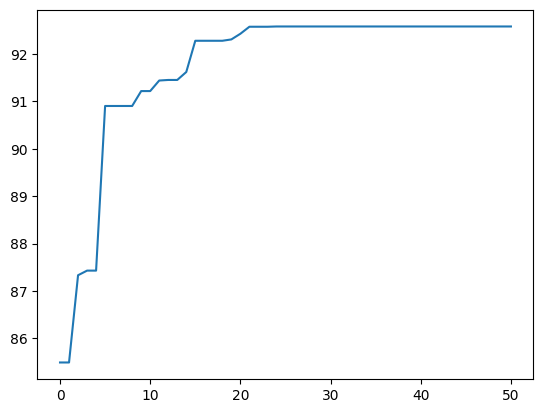

generacion 31, best_fitness = 92.58115132702544
Generacion 0 (de 50) 
Generacion 10 (de 50) 
Generacion 20 (de 50) 
Generacion 30 (de 50) 


In [ ]:
pmut  = [0.15,0.25,0.5,0.75,1]
crossover = ['onepoint','uniform']
mutation = ['flip','multiflip']
n_corridas=3
lst_pmut=[]
lst_crossover=[]
lst_mutation=[]
gen=[]
bestch=[]
bestfit=[]
lst_pareto=[]
for n in range(len(pmut)):
  for k in range(len(crossover)):
    for l in range(len(mutation)):
      print('crossover= {}'.format(crossover[k]))
      print('mutation= {}'.format(mutation[l]))
      print('pmut= {:.2f}'.format(pmut[n]))

      lst_bestfitness=[]
      lst_bestgen=[]
      lst_bestch=[]
      
      for a in range(n_corridas):
        pareto_front_population = algoritmo_multiobjetivo(poblacion_inicial,n_gen = GENERATIONS,pmut = pmut[n],n_items =NUM_LOC,crossover = crossover[k],mutation = mutation[l],min_pop_size = POP_SIZE,max_pop_size=POP_SIZE,distances=distances,df_tam_poblac=df_tam_poblac)
        
        best_ind, bestfitness,best_ch = genetic_algorithm(poblacion_inicial, distances,df_tam_poblac, GENERATIONS, pmut[n], 
                                          crossover[k], mutation[l], selection_parents_method = 'roulette',selection_survivors_method = 'ranking')
        plt.plot(bestfitness)
        plt.show()
        # muestra la evolucion del mejor fitness
        b=0
        c=0
        #print("bestfitness = {}".format(bestfitness))
        for j in range(len(bestfitness)):
          if bestfitness[j]>b:
            b=bestfitness[j]
            c=j
            if c==0:
              c=0
            else:
              c=c-1
        print("generacion {}, best_fitness = {}".format(c, b))
        lst_bestfitness.append(b)
        lst_bestgen.append(c)
        lst_bestch.append(best_ch)
      m=0
      for i in range(len(lst_bestfitness)):
        if lst_bestfitness[i]==max(lst_bestfitness) and m==0:
         m=1
         bestfit.append(lst_bestfitness[i])
         gen.append(lst_bestgen[i])
         bestch.append(lst_bestch[i])
      lst_pareto.append(pareto_front_population)
      lst_crossover.append(crossover[k])   
      lst_mutation.append(mutation[l])
      lst_pmut.append(pmut[n])
      #print("generacion {}, best_fitness = {} , best_cromosoma = {} , crossover ={}, mutacion ={} , tasa_mut ={}".format(gen[l], bestfit[l], bestch[l],lst_crossover[k], lst_mutation[l],lst_pmut[j]))

In [ ]:
#for i in range (len(poblacion_inicial)):
 # print(poblacion_inicial[i].chromosome)

In [ ]:
print("crossover {}".format(len(lst_crossover)))
print("mutation {}".format(len(lst_mutation)))
print("pmut {}".format(len(lst_pmut)))
print("pmut {}".format(lst_pmut))
print("bestfit {}".format(len(bestfit)))
print("gen {}".format(len(gen)))
print("bestch {}".format(len(bestch)))
print("bestfit {}".format(bestfit))
print("gen {}".format(gen))
print("bestch {}".format(bestch))
print("pareto {}".format(len(lst_pareto)))

In [ ]:
# Evolue la poblacion con el algoritmo genetico (cruzamiento 'onepoint', )
#for i in bestfit:
# muestra la evolucion del mejor fitness
 # plt.plot(bestfitness[i])
  #plt.show()

In [ ]:
#P = deepcopy(poblacion_inicial)
#evaluate_population_multi(P,distances,df_tam_poblac)

In [ ]:
#Se identifica el tamaño de población y la distancia de los mejores fitness de cada combinacion de parametros
sum_poblacion_f=[]
sum_distancia_f=[]
for c in range(len(bestch)):
  sum_poblacion=0
  sum_distancia=0
  best_ch_f = deepcopy(bestch[c])
  for i in range(len(bestch[c])):
   sum_poblacion += df_tam_poblac.iloc[best_ch_f[i],4]
   for j in range(len(best_ch_f)):
      sum_distancia += distances[best_ch_f[i]][best_ch_f[j]]
   sum_distancia = sum_distancia/2
   sum_poblacion = sum_poblacion/df_tam_poblac['Poblacion500m'].sum()
  sum_poblacion_f.append(sum_poblacion)
  sum_distancia_f.append(sum_distancia)

In [ ]:
#pareto_front_population = algoritmo_multiobjetivo(poblacion_inicial,n_gen = GENERATIONS,pmut = 1,n_items =NUM_LOC,crossover = "uniform",mutation = "flip",min_pop_size = POP_SIZE,max_pop_size=POP_SIZE,distances=distances,df_tam_poblac=df_tam_poblac)

In [ ]:
#pareto_front_population
#len(sum_poblacion_f)
#sum_poblacion_f[0]
#sum_distancia_f[0]
#lst_pareto[0].fitness

In [ ]:
## Plotea los individuos de la frontera de Pareto final
chromosome_multiobjetivo=[]
poblacion_multiobjetivo=[]
distancias_multiobjetivo=[]
for i in range(len(lst_pareto)):
  pareto_front_pop = deepcopy(lst_pareto[i])
  pop_size = len(pareto_front_pop)
  num_objectives = len(pareto_front_pop[0].fitness)
  chromosome_prev=[]
  for j in range (len(pareto_front_pop) ):
    chromosome_prev.append(pareto_front_pop[j].chromosome)
  #print("chromosome_prev")    print(chromosome_prev)
  chromosome_multiobjetivo.append(chromosome_prev)
  print(sum_distancia_f[i])
  print(sum_poblacion_f[i])
  x_1=sum_distancia_f[i]
  y_1=sum_poblacion_f[i]
  plt.title( 'f Crosover={} ,Mutation={}, Tasa Mutacion={}'.format(lst_crossover[i] , lst_mutation[i] , lst_pmut[i] ), loc='center')
# extrae los fitness de la poblacion en la matriz fitnesses
  fitnesses = np.zeros([pop_size, num_objectives])
  for i in range(pop_size): fitnesses[i,:] = pareto_front_pop[i].fitness

  x = fitnesses[:, 0]
  y = fitnesses[:, 1]
  poblacion_multiobjetivo.append(x)
  distancias_multiobjetivo.append(y)
#x = np.concatenate([x, [tupla_valores_mono_objetivo[0]]])
#y = np.concatenate([y, [tupla_valores_mono_objetivo[1]]])
  
  plt.xlabel('Objectivo A - Distancia (km)')
  plt.ylabel('Objectivo B - Poblacion')
  a=plt.scatter(x,y, marker='o')
  b=plt.scatter(x_1,y_1,marker='o')
  plt.legend((a,b),('MultiObjetivo', 'Mono Objetivo'))

#plt.savefig('pareto.png')
  plt.show()

In [ ]:
#chromosome_multiobjetivo[0]

In [ ]:
tabla_resul_monoobjetivo = {
    'Crossover' : lst_crossover,
    'Mutation': lst_mutation,
    'Tasa_Mutation': lst_pmut,
    'Generacion': gen,
    'Suma_Distancias_Monoobjetivo':sum_distancia_f ,
    'Suma_Poblacion_Monoobjetivo' :sum_poblacion_f ,
    'Fitness_Monoobjetivo': bestfit ,
    'Mejor_Chromosoma_Monoobjetivo': bestch
}

df_resul_monoobjetivo = pd.DataFrame(tabla_resul_monoobjetivo)
df_resul_monoobjetivo

In [ ]:
df_resul_monoobjetivo.to_csv('resul_monoobjetivo.csv', encoding='utf-8', index=False, sep=';' )

In [ ]:
tabla_resul_multiobjetivo = {
    'Crossover' : lst_crossover,
    'Mutation': lst_mutation,
    'Tasa_Mutation': lst_pmut,
    'Suma_Distancias_Multiobjetivo':distancias_multiobjetivo,
    'Suma_Poblacion_Multiobjetivo' :poblacion_multiobjetivo ,
    'Mejor_Chromosoma_Multiobjetivo': chromosome_multiobjetivo
}

df_resul_multiobjetivo = pd.DataFrame(tabla_resul_multiobjetivo)
df_resul_multiobjetivo["Mejor_Chromosoma_Multiobjetivo"]

In [ ]:
df_resul_multiobjetivo.to_csv('resul_multiobjetivo.csv', encoding='utf-8', index=False, sep=';' )